# Analysis of Foreign Bank Branches

In this course project I utilize the dataset by Claessens and Van Horen (2014) to explore and visualize the data on foreing bank branches. The dataset includes 5000+ banks across 139 countries and their ultimate ownership by country. Thoughout this project I use the Python Libraries Pandas, Matplotlib, and Seaborn. There are three main findings in the project. First (i), I identify countries with the highest rate of involvement of foreign banks, second (ii), I identify which countries have the most bank branches in other countries, and third (iii), I present the relationship between involvement of foreign banks in the domstic market and domestic banks involvement in foreign markets.

## Downloading the Dataset

The dataset used is by Claessens and Van Horen (2014). It is a public dataset posted at https://neeltjevanhoren.com/my-research/datasets/.

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import os
import pandas as pd
import numpy as np

In [4]:
banks_df = pd.read_csv('banks.csv',encoding = "ISO-8859-1")

The dataset has been downloaded and extracted.

In [5]:
import jovian

In [6]:
project_name='foreign_banks'
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jiri-havel16/foreign-banks" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jiri-havel16/foreign-banks


'https://jovian.ai/jiri-havel16/foreign-banks'

## Data Preparation and Cleaning

I use Pandas to read the downloaded dataset and explore the dimensions and descriptive statistics.



In [7]:
banks_df.shape

(5498, 59)

In [8]:
banks_df

,region,incgroup,offshore,country,cntrycode,bankname 2013,bankname 2009,spec,index_consol,cons_code,...,ownsou2004,ownsou2005,ownsou2006,ownsou2007,ownsou2008,ownsou2009,ownsou2010,ownsou2011,ownsou2012,ownsou2013
0,ECA,DEV,0,ALBANIA,ALB,Alpha Bank SH.A,Alpha Bank SH.A,Commercial Banks,14561,U1,...,GREECE,GREECE,GREECE,GREECE,GREECE,GREECE,GREECE,GREECE,GREECE,GREECE
1,ECA,DEV,0,ALBANIA,ALB,Banka Kombetare Tregtare Sh.a.-National Commer...,Banka Kombetare Tregtare Sh.s.-National Commer...,Commercial Banks,17265,U1,...,CROATIA,CROATIA,TURKEY,TURKEY,TURKEY,TURKEY,TURKEY,TURKEY,TURKEY,TURKEY
2,ECA,DEV,0,ALBANIA,ALB,Banka Societe Generale Albania Sh.A,Banka Popullore Sh.A,Commercial Banks,40931,U1,...,DOM,DOM,DOM,FRANCE,FRANCE,FRANCE,FRANCE,FRANCE,FRANCE,FRANCE
3,ECA,DEV,0,ALBANIA,ALB,Credins Bank Sh.A,Credins Bank Sh.A,Commercial Banks,40932,U1,...,DOM,DOM,DOM,DOM,DOM,DOM,DOM,DOM,DOM,DOM
4,ECA,DEV,0,ALBANIA,ALB,Credit Agricole Bank (Albania),Emporiki Bank - Albania SA,Commercial Banks,40598,U1,...,GREECE,GREECE,GREECE,GREECE,GREECE,GREECE,GREECE,GREECE,FRANCE,FRANCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5493,SSA,DEV,0,ZIMBABWE,ZWE,Stanbic Bank Zimbabwe Limited,Stanbic Bank Zimbabwe Limited,Commercial Banks,36961,U1,...,SOUTH AFRICA,SOUTH AFRICA,SOUTH AFRICA,SOUTH AFRICA,SOUTH AFRICA,SOUTH AFRICA,SOUTH AFRICA,SOUTH AFRICA,SOUTH AFRICA,SOUTH AFRICA
5494,SSA,DEV,0,ZIMBABWE,ZWE,Standard Chartered Bank Zimbabwe Ltd,Standard Chartered Bank Zimbabwe Ltd,Commercial Banks,31650,C1,...,UNITED KINGDOM,UNITED KINGDOM,UNITED KINGDOM,UNITED KINGDOM,UNITED KINGDOM,UNITED KINGDOM,UNITED KINGDOM,UNITED KINGDOM,UNITED KINGDOM,UNITED KINGDOM
5495,SSA,DEV,0,ZIMBABWE,ZWE,Time Bank of Zimbabwe,Time Bank of Zimbabwe,Commercial Banks,48000,U1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5496,SSA,DEV,0,ZIMBABWE,ZWE,Trust Bank Corporation Limited,Trust Bank Corporation Limited,Commercial Banks,17065,C1,...,DOM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
banks_df.describe()

,offshore,index_consol,index_unconsol,yoe,yoi,added2014,own1995,own1996,own1997,own1998,...,own2004,own2005,own2006,own2007,own2008,own2009,own2010,own2011,own2012,own2013
count,5498.000000,5498.000000,5498.000000,5465.000000,1639.000000,5498.000000,4185.00000,4296.000000,4391.000000,4420.000000,...,4262.000000,4244.000000,4204.000000,4196.000000,4185.000000,4142.000000,4061.000000,3983.000000,3905.00000,3834.000000
mean,0.041470,34059.143325,32753.222808,1931.702653,2004.473459,0.039651,0.20908,0.219507,0.231610,0.242986,...,0.287658,0.297597,0.315652,0.334366,0.343369,0.348865,0.352376,0.354005,0.35621,0.356808
std,0.199392,11867.408482,12174.074604,133.273372,4.856588,0.195155,0.40670,0.413960,0.421909,0.428935,...,0.452724,0.457255,0.464830,0.471825,0.474890,0.476669,0.477769,0.478271,0.47894,0.479120
min,0.000000,10006.000000,10004.000000,1472.000000,1996.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,24818.250000,21864.250000,1941.000000,2000.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,35191.000000,32736.500000,1985.000000,2004.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,44884.250000,43992.500000,1995.000000,2009.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
max,1.000000,73312.000000,73262.000000,2013.000000,2013.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [10]:
import jovian

In [11]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jiri-havel16/foreign-banks" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jiri-havel16/foreign-banks


'https://jovian.ai/jiri-havel16/foreign-banks'

## Exploratory Analysis and Visualization

In this section, I calculate and visualize the number of total, foreign and domestic banks by country.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

First, I show which countries have the most banks in the dataset.

In [13]:
top_banks = banks_df.country.value_counts().head(15)
top_banks

RUSSIAN FEDERATION     279
BRAZIL                 204
CHINA-PEOPLE'S REP.    167
ARGENTINA              131
INDONESIA              122
FRANCE                 116
ITALY                  114
PANAMA                 111
SPAIN                  111
GERMANY                111
SWITZERLAND            104
AUSTRIA                101
JAPAN                  100
NORWAY                 100
UNITED KINGDOM          92
Name: country, dtype: int64

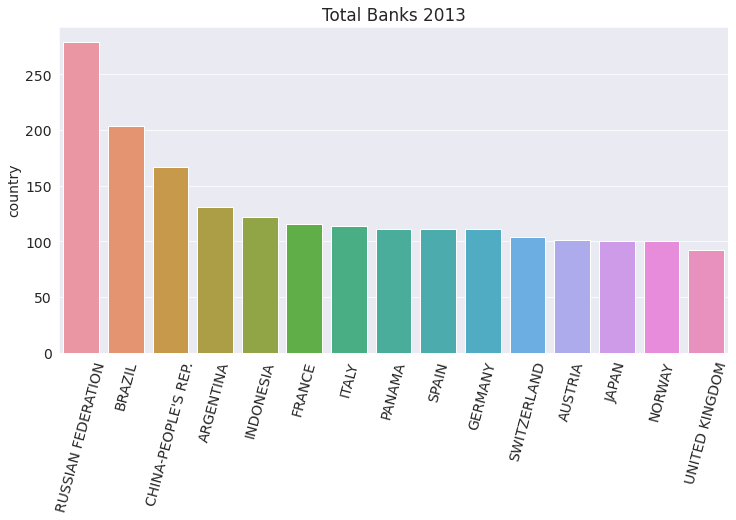

In [14]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Total Banks 2013')
sns.barplot(x=top_banks.index, y=top_banks);

Second, I show which countries have the most foreign banks.

In [15]:
df = banks_df[banks_df["own2013"] == 1]
top_foreign = df.country.value_counts().head(15)
top_foreign

LUXEMBOURG             61
BRAZIL                 50
UNITED KINGDOM         48
PANAMA                 41
POLAND                 32
INDONESIA              31
RUSSIAN FEDERATION     31
CHINA-PEOPLE'S REP.    29
HONG KONG              27
UKRAINE                23
ROMANIA                23
SERBIA                 21
HUNGARY                20
ARGENTINA              20
CANADA                 19
Name: country, dtype: int64

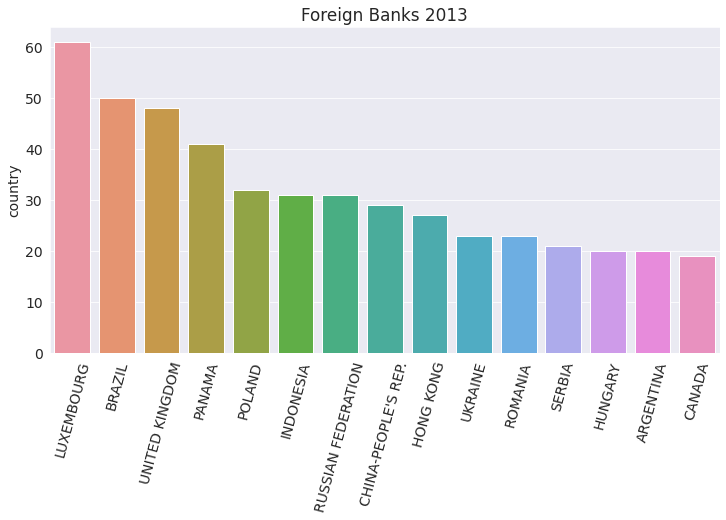

In [16]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Foreign Banks 2013')
sns.barplot(x=top_foreign.index, y=top_foreign);

Third, I compare the number of foreign vs. domestic banks in the dataset.

In [17]:
foreign_counts = banks_df.own2013.value_counts()
foreign_counts

0.0    2466
1.0    1368
Name: own2013, dtype: int64

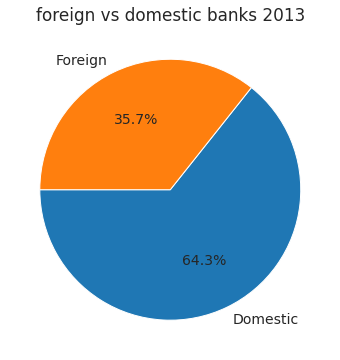

In [18]:
plt.figure(figsize=(12,6))
plt.title('foreign vs domestic banks 2013')
plt.pie(foreign_counts, labels=['Domestic', 'Foreign'], autopct='%1.1f%%', startangle=180);

In [19]:
import jovian

In [20]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jiri-havel16/foreign-banks" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jiri-havel16/foreign-banks


'https://jovian.ai/jiri-havel16/foreign-banks'

## Asking and Answering Questions

In this section, I show the relative involvement of foreign banks in the domestic market and domestic bank's involvement in foreign markets.



#### Q1: Which country has the highest rate of foreign banks in year 2013?

In [21]:
top_banks = banks_df.country.value_counts()
df = banks_df[banks_df["own2013"] == 1]
top_foreign = df.country.value_counts()

In [22]:
df1 = pd.DataFrame(top_banks).rename(columns={"country": "total"})
df2 = pd.DataFrame(top_foreign).rename(columns={"country": "foreign"})
df3 = pd.concat([df1,df2], axis=1).fillna(0)
df3['rate'] = df3.foreign/df3.total
df3 = df3.sort_values('rate', ascending=False)

In [23]:
df4 = df3.loc[df3.total > 10].head(15)
df4

,total,foreign,rate
ZAMBIA,18,15.0,0.833333
ALBANIA,14,11.0,0.785714
LUXEMBOURG,78,61.0,0.782051
SENEGAL,13,10.0,0.769231
MOZAMBIQUE,15,11.0,0.733333
"CONGO, DEMOCRATIC REP. OF",14,10.0,0.714286
COTE D'IVOIRE,15,10.0,0.666667
ARMENIA,19,12.0,0.631579
UGANDA,24,15.0,0.625000
EL SALVADOR,16,10.0,0.625000


#### Q2: What is the distribution of foreign bank share among countries?

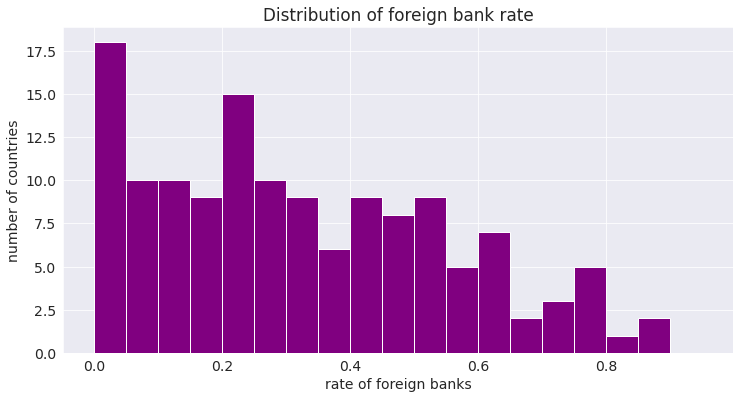

In [24]:
plt.figure(figsize=(12, 6))
plt.title('Distribution of foreign bank rate')
plt.xlabel('rate of foreign banks')
plt.ylabel('number of countries')

plt.hist(df3.rate, bins=np.arange(0,1,0.05), color='purple');

#### Q3: Which region has the highest rate of foreign banks in year 2013?

In [25]:
top_banks = banks_df.region.value_counts()
df = banks_df[banks_df["own2013"] == 1]
top_foreign = df.region.value_counts()

In [26]:
df11 = pd.DataFrame(top_banks).rename(columns={"region": "total"})
df22 = pd.DataFrame(top_foreign).rename(columns={"region": "foreign"})
df33 = pd.concat([df11,df22], axis=1).fillna(0)
df33['rate'] = df33.foreign/df33.total
df33 = df33.sort_values('rate', ascending=False)

In [27]:
df44 = df33.head(15)
df44

,total,foreign,rate
SSA,539,213,0.395176
ECA,1079,347,0.321594
MENA,223,65,0.291480
OHI,239,66,0.276151
LAC,1114,258,0.231598
EAP,537,111,0.206704
OECD,1574,286,0.181703
SA,193,22,0.113990


#### Q4: Which country has the most bank branches abroad?

In [28]:
top_ex = pd.DataFrame(banks_df.ownsou2013.value_counts())
top_ex = top_ex.drop(index='DOM')
top_ex.sort_values('ownsou2013', ascending=False).head(15)

,ownsou2013
UNITED STATES,122
FRANCE,109
UNITED KINGDOM,93
GERMANY,66
ITALY,49
RUSSIAN FEDERATION,46
AUSTRIA,41
NETHERLANDS,39
CANADA,38
SWITZERLAND,36


#### Q5:  What is the relationship between share of foreign banks and bank branches abroad?

In [29]:
df5 = pd.concat([top_ex, df3], axis=1).fillna(0)
df5 = pd.DataFrame(df5).rename(columns={"ownsou2013": "abroad"})
df5['abroad_rate'] = df5.abroad/df5.total
df5['abroad_rate'].replace(np.inf, 0, inplace=True)
df5 = df5.loc[df5.total > 10]
df5

,abroad,total,foreign,rate,abroad_rate
UNITED STATES,122.0,89.0,18.0,0.202247,1.370787
FRANCE,109.0,116.0,4.0,0.034483,0.939655
UNITED KINGDOM,93.0,92.0,48.0,0.521739,1.010870
GERMANY,66.0,111.0,14.0,0.126126,0.594595
ITALY,49.0,114.0,9.0,0.078947,0.429825
...,...,...,...,...,...
BOLIVIA,0.0,16.0,3.0,0.187500,0.000000
AZERBAIJAN,0.0,27.0,3.0,0.111111,0.000000
NEPAL,0.0,32.0,3.0,0.093750,0.000000
MONGOLIA,0.0,11.0,1.0,0.090909,0.000000


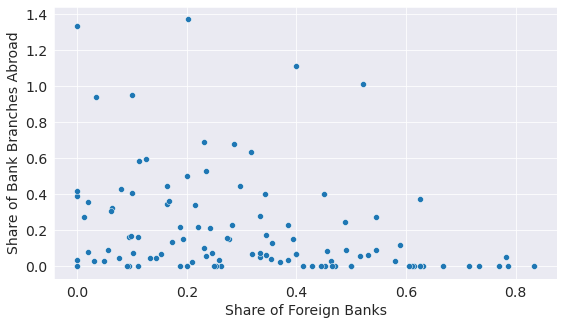

In [30]:
sns.scatterplot(x='rate', y='abroad_rate',data=df5)
plt.xlabel("Share of Foreign Banks")
plt.ylabel("Share of Bank Branches Abroad");

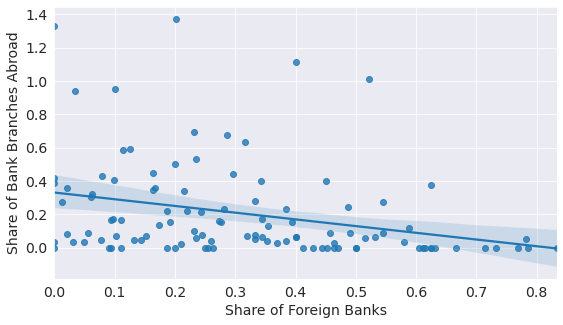

In [31]:
sns.regplot(x='rate', y='abroad_rate',data=df5)
plt.xlabel("Share of Foreign Banks")
plt.ylabel("Share of Bank Branches Abroad");

In [32]:
import jovian

In [33]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jiri-havel16/foreign-banks" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jiri-havel16/foreign-banks


'https://jovian.ai/jiri-havel16/foreign-banks'

## Inferences and Conclusion

Using a dataset with 5000+ banks across 139 countries, I find a negative relationship between the share of foreign banks in the domestic market and share of domestic bank's branches in foreign markets. In other words, countries with larger participation of foreign banks tend to have less bank branches abroad.

In [34]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jiri-havel16/foreign-banks" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jiri-havel16/foreign-banks


'https://jovian.ai/jiri-havel16/foreign-banks'

## References and Future Work

For future research, linear approximation with controls of economic and financial development can be used to asses the trends in foreign banking more accurately. 

In [36]:
import jovian

In [37]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jiri-havel16/foreign-banks" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jiri-havel16/foreign-banks


'https://jovian.ai/jiri-havel16/foreign-banks'

In [ ]:
jovian.submit(assignment="zero-to-pandas-project")

<IPython.core.display.Javascript object>